# Iris Dataset Classification with Decision Tree

In this notebook, we will build, train, and evaluate a Decision Tree classifier using the Iris dataset. We will also visualize the decision boundaries and make predictions on new data.

## Step 1: Import Libraries

First, we import the necessary libraries for our analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Matplotlib is building the font cache; this may take a moment.


## Step 2: Load and Inspect the Dataset

We load the Iris dataset and create a DataFrame for easier manipulation. Let's inspect the first few rows of the dataset.

In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 3: Preprocess the Data

We split the dataset into features and target, and then further split it into training and testing sets.


In [3]:
# Split the data into features and target
X = df.iloc[:, :-1].values
y = df['species'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 4: Train the Model

We create and train a Decision Tree classifier using the training data.


In [4]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

## Step 5: Evaluate the Model

We make predictions on the test set and evaluate the model's performance using accuracy, confusion matrix, and classification report.


In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Step 6: Visualize the Decision Boundaries

To understand how the model makes decisions, we visualize the decision boundaries using the first two features of the dataset.


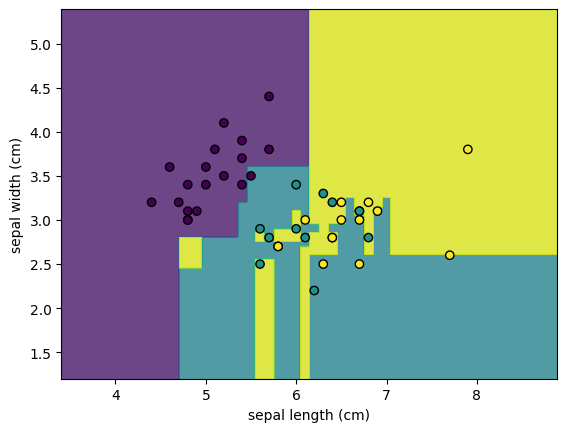

In [6]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Train a model using only the first two features for visualization
model_viz = DecisionTreeClassifier()
model_viz.fit(X_train[:, :2], y_train)

# Plot decision boundaries
plot_decision_boundaries(X_test[:, :2], y_test, model_viz)


## Step 7: Make Predictions on New Data

We demonstrate how to use the trained model to make predictions on new data.


In [7]:
# Example: Predicting the species of a new flower
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Sample features: [sepal length, sepal width, petal length, petal width]
prediction = model.predict(sample_data)
predicted_species = iris.target_names[prediction][0]
print(f'Predicted Species: {predicted_species}')


Predicted Species: setosa
